### Exploring the WoS dataset

In [1]:
import pandas as pd
import folium

In [2]:
df = pd.read_excel(f'country.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10 non-null     int64 
 1   country              10 non-null     object
 2   documents            10 non-null     int64 
 3   citations            10 non-null     int64 
 4   total link strength  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [4]:
df= df.sort_values(by='documents', ascending = False)

In [5]:
df['total'] = df['documents'].sum(axis=0)
df['percentage'] = df['documents']/df['total']*100

In [6]:
df.head()

,id,country,documents,citations,total link strength,total,percentage
5,60,peoples r china,1083,23481,337400,2784,38.900862
9,87,usa,470,19466,214853,2784,16.882184
7,74,south korea,233,4033,111490,2784,8.369253
1,14,canada,168,4225,95755,2784,6.034483
2,24,england,167,4107,84962,2784,5.998563


Text(0.5, 1.0, 'The top 10 most published countries.')

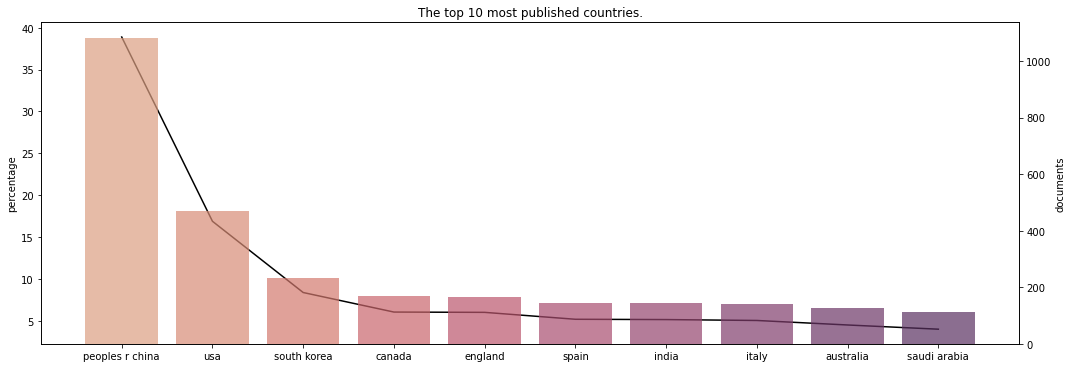

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax1 = plt.subplots(figsize = (15,5))

ax2 = ax1.twinx()

sns.barplot(x="country", y="documents", data=df, ax=ax2, alpha=0.7, palette = "flare")
sns.lineplot(x=np.arange(0,len(df)), y="percentage", data=df, ax=ax1, color = 'black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('The top 10 most published countries.')


In [8]:
dfu = pd.read_excel(f'univ.xlsx')

In [9]:
dfu= dfu.sort_values(by='documents', ascending = False)

In [10]:
dfu.columns

Index(['id', 'organization', 'documents', 'citations', 'total link strength'], dtype='object')

Text(0.5, 1.0, 'The top 10 organizations.')

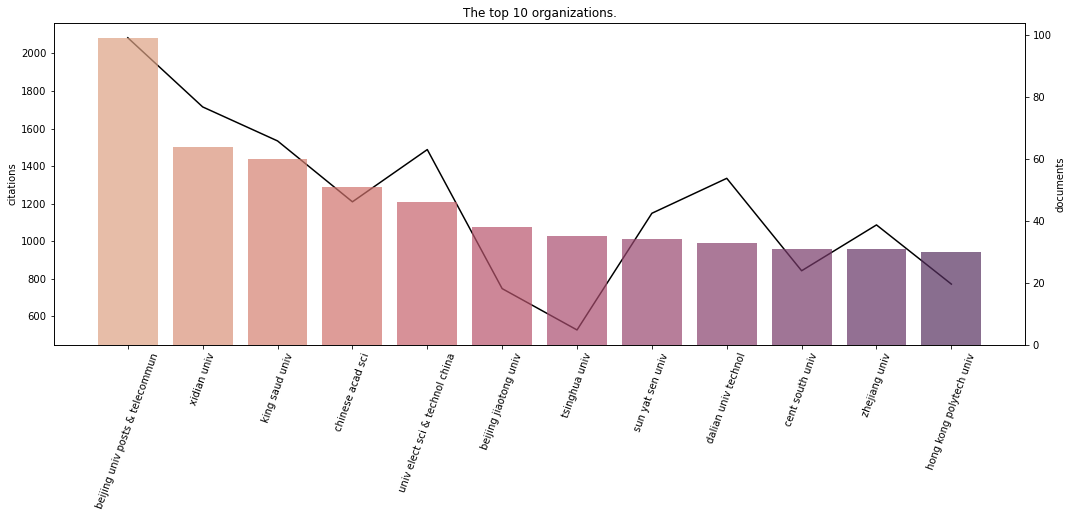

In [11]:
fig, ax1 = plt.subplots(figsize = (15,5))

ax2 = ax1.twinx()

sns.barplot(x="organization", y="documents", data=dfu, ax=ax2, alpha=0.7, palette = "flare" )
sns.lineplot(x=np.arange(0,len(dfu)), y="citations", data=dfu, ax=ax1, color = 'black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.setp(ax1.get_xticklabels(), rotation=70)
plt.title('The top 10 organizations.')